In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
mpl.rc('font', family='Liberation Sans')
import seaborn as sns
import numpy as np

In [14]:
low = pd.read_csv('../outputs/w_diffs_hh_inc_deflated_li.csv', index_col=0)[-8:6]
low = low.mean(axis=1)
np.sqrt(sum(low[:-1]**2)/8)

/tmp/ipykernel_25737/337396604.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  low = pd.read_csv('../outputs/w_diffs_hh_inc_deflated_li.csv', index_col=0)[-8:6]
/tmp/ipykernel_25737/337396604.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  np.sqrt(sum(low[:-1]**2)/8)


35.58924012512083

/tmp/ipykernel_25737/2040002468.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_25737/2040002468.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_25737/2040002468.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 513)
(15, 637)


/tmp/ipykernel_25737/2040002468.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 2474)


/tmp/ipykernel_25737/2040002468.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 4899)


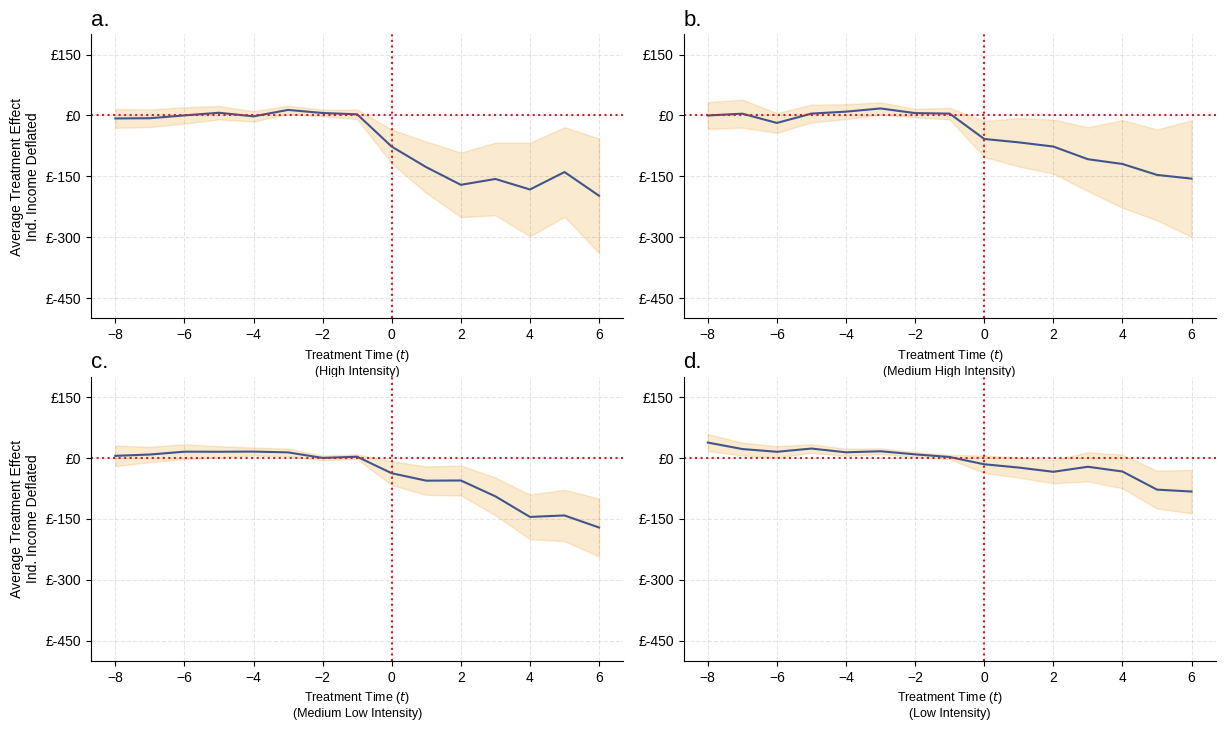

In [7]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    print(differences.shape)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color=colors[1], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine()

path1 = '../outputs/w_diffs_ind_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_ind_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_ind_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_ind_inc_deflated_li.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-500, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_20076/1438159348.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_20076/1438159348.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20076/1438159348.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_20076/1438159348.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.rea

(15, 224)
(15, 927)
(15, 1010)


/tmp/ipykernel_20076/1438159348.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 6361)


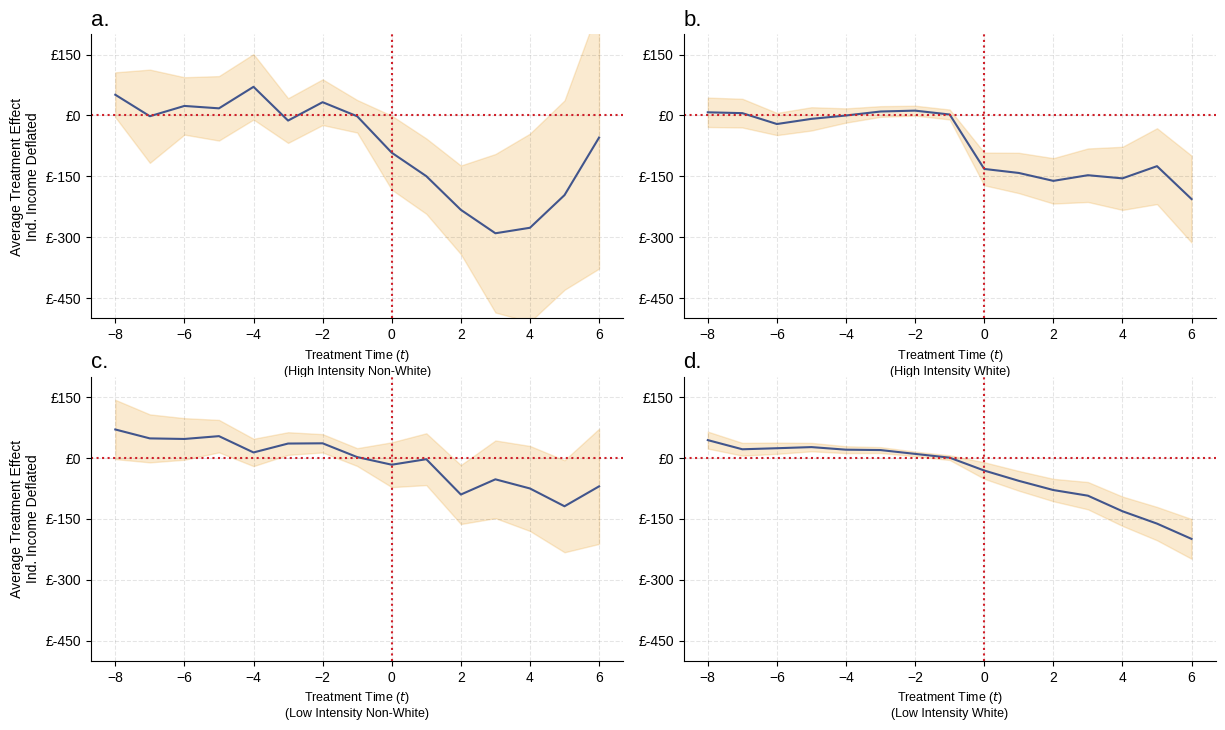

In [25]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    print(differences.shape)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color=colors[1], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine() 

path1 = '../outputs/w_diffs_ind_inc_deflated_high_nw.csv'
path2 = '../outputs/w_diffs_ind_inc_deflated_high_w.csv'
path3 = '../outputs/w_diffs_ind_inc_deflated_low_nw.csv'
path4 = '../outputs/w_diffs_ind_inc_deflated_low_w.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-500, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity Non-White)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(High Intensity White)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Low Intensity Non-White)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity White)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_25737/1296066603.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_25737/1296066603.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_25737/1296066603.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_25737/1296066603.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.rea

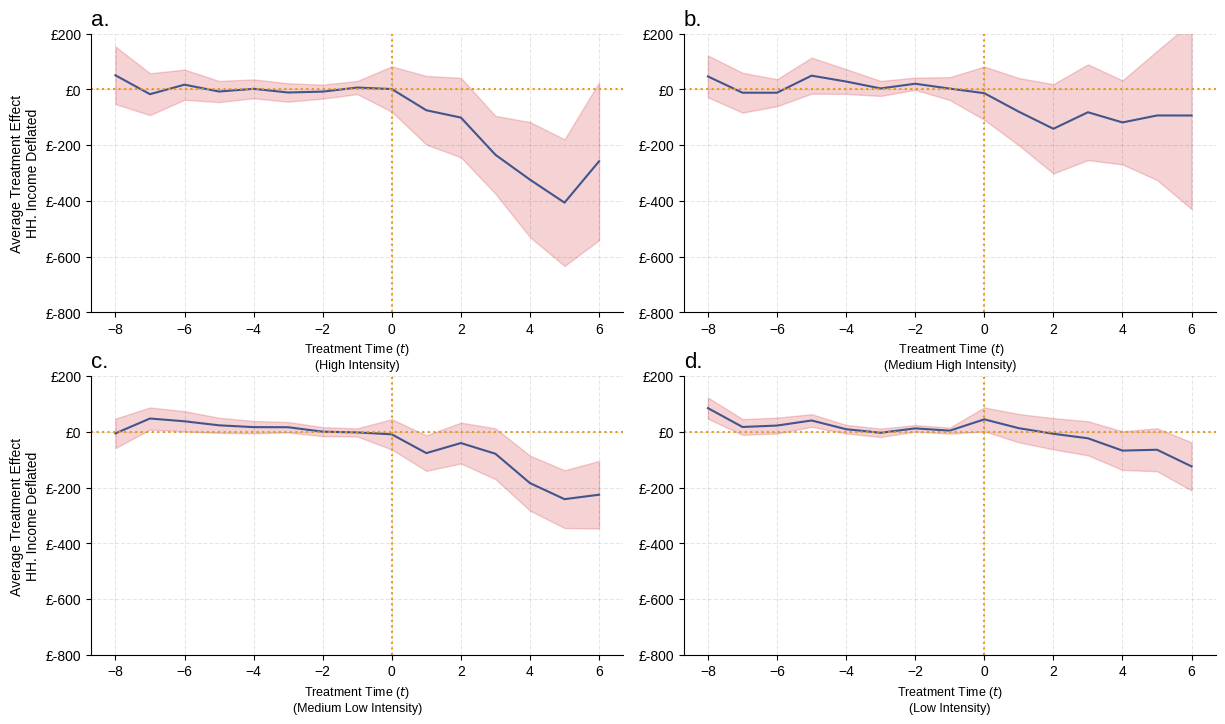

In [4]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    ax.axvline(x=0, linestyle='dotted', color=colors[1])
    ax.axhline(y=0, linestyle='dotted', color=colors[1])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color=colors[2], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine() 

path1 = '../outputs/w_diffs_hh_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_hh_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_hh_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_hh_inc_deflated_li.csv'

varname = 'HH. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-800, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_25737/1483753177.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_25737/1483753177.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_25737/1483753177.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 497)
(15, 617)


/tmp/ipykernel_25737/1483753177.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 2354)


/tmp/ipykernel_25737/1483753177.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 4615)


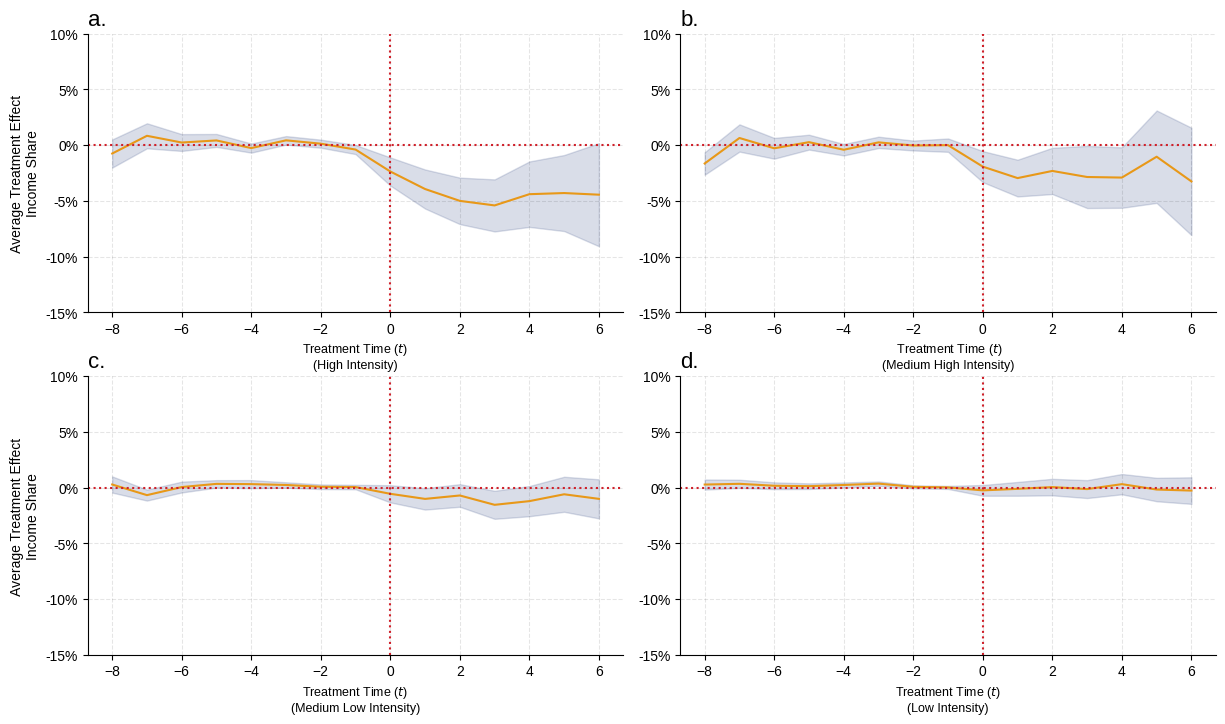

In [10]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[1], ax=ax)
    print(differences.shape)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color=colors[0], alpha=0.2)
    ax.yaxis.set_major_formatter('{x:1.0f}%')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine() 

path1 = '../outputs/w_diffs_inc_share_hi.csv'
path2 = '../outputs/w_diffs_inc_share_mhi.csv'
path3 = '../outputs/w_diffs_inc_share_mli.csv'
path4 = '../outputs/w_diffs_inc_share_li.csv'

varname = 'Income Share'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-15, 10)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_5643/467892157.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv('./robust_test/synths_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]
/tmp/ipykernel_5643/467892157.py:12: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv('./robust_test/treats_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]


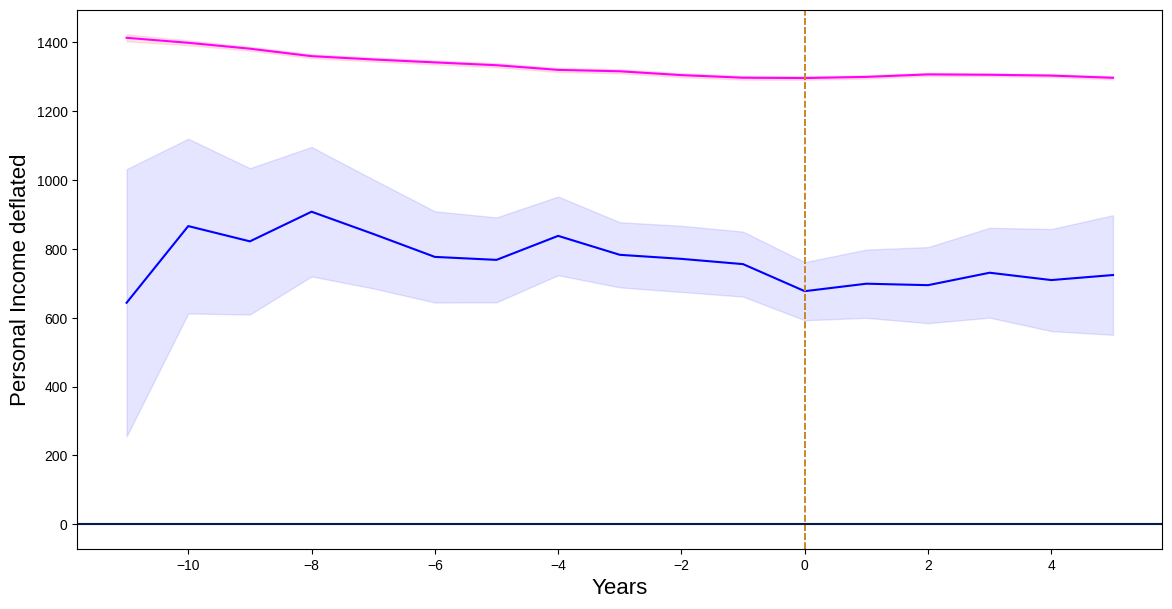

In [25]:
mpl.rc('font', family='Liberation Sans')

figure(figsize=(14, 7))
differences = pd.read_csv('./robust_test/synths_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]
ax = differences.mean(axis=1).plot(color='magenta')
plt.axvline(x=0, linestyle='--', color='#001c54', alpha=1, linewidth=1.25)
plt.axhline(y=0, color='#E89818', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='red', alpha=0.1)
differences = pd.read_csv('./robust_test/treats_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]
ax = differences.mean(axis=1).plot(color='blue')
plt.axvline(x=0, linestyle='--', color='#E89818', alpha=1, linewidth=1.25)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Personal Income deflated', fontsize=16)
plt.axhline(y=0, color='#001c54', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='blue', alpha=0.1)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()